In [1]:
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import requests
import os
import alpaca_trade_api as tradeapi
import requests

%matplotlib inline

/Users/johnbilsel/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


ModuleNotFoundError: No module named 'dotenv'

In [2]:
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

In [4]:
#verify
type(alpaca_api_key)
type(alpaca_secret_key)

str

### TO save moving your .env file everywhere

In [9]:
from pathlib import Path
load_dotenv(Path('C:/.env'))

False

## This stuff below saves you from using "import request" and all of the stuff associated

Link to all of the requests: https://pypi.org/project/alpaca-trade-api/

In [8]:
#Create the Alpaca API object
alpaca = tradeapi.REST?

Init signature:
tradeapi.REST(
    key_id: str = None,
    secret_key: str = None,
    base_url: alpaca_trade_api.common.URL = None,
    api_version: str = None,
    oauth=None,
    raw_data: bool = False,
)
Docstring:      <no docstring>
Init docstring:
:param raw_data: should we return api response raw or wrap it with
                 Entity objects.
File:           /opt/anaconda3/envs/dev/lib/python3.7/site-packages/alpaca_trade_api/rest.py
Type:           type
Subclasses:     


## Initialize the API

In [10]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [11]:
#REST object test
alpaca

In [12]:
alpaca.get_bars?

Signature:
alpaca.get_bars(
    symbol: Union[str, List[str]],
    timeframe: alpaca_trade_api.rest.TimeFrame,
    start: Union[str, NoneType] = None,
    end: Union[str, NoneType] = None,
    adjustment: str = 'raw',
    limit: int = None,
    feed: Union[str, NoneType] = None,
    asof: Union[str, NoneType] = None,
) -> alpaca_trade_api.entity_v2.BarsV2
Docstring: <no docstring>
File:      /opt/anaconda3/envs/dev/lib/python3.7/site-packages/alpaca_trade_api/rest.py
Type:      method


In [83]:
#Format Current date as ISO format

today = pd.Timestamp('2021-05-14', tz = 'America/New_York').isoformat()
nottoday = pd.Timestamp('2022-07-14', tz = 'America/New_York').isoformat()

In [84]:
tickers = ['FB', 'TWTR']

In [85]:
#set timeframe to one day ("1Day") for the alpaca api

timeframe = '1Day'

## Import the data

In [86]:
#get current closing prices for tickers
df_pork = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = nottoday
).df #WHY DO WE PUT .df?

#display sample data
df_pork.head(5)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-05-14 04:00:00+00:00,309.540,316.85,309.08,315.94,19187703,232183,313.971450,FB
2021-05-17 04:00:00+00:00,313.550,315.68,311.58,315.46,15400943,176917,314.103262,FB
2021-05-18 04:00:00+00:00,315.590,316.50,309.81,309.96,14522332,197125,313.432871,FB
2021-05-19 04:00:00+00:00,304.185,314.66,303.57,313.59,19105844,243869,310.615098,FB
2021-05-20 04:00:00+00:00,313.580,319.25,313.16,318.61,17319741,214875,317.385351,FB


In [87]:
from alpaca_trade_api.rest import TimeFrame, TimeFrameUnit

### Getting hourly/minutes data

In [89]:
#get current closing prices for tickers
df_port = alpaca.get_bars(
    tickers,
    TimeFrame(5, TimeFrameUnit.Hour), # Every 5 hours
    start = today,
    end = nottoday
).df #WHY DO WE PUT .df?

#display sample data
df_port

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-05-14 08:00:00+00:00,307.800,309.500,307.5000,308.710,50561,970,308.550892,FB
2021-05-14 13:00:00+00:00,308.700,314.775,308.0900,314.760,11596333,150582,312.683275,FB
2021-05-14 18:00:00+00:00,314.760,316.850,314.6500,316.620,7361740,79132,316.000396,FB
2021-05-14 23:00:00+00:00,316.400,317.000,316.4000,317.000,5899,64,316.680910,FB
2021-05-17 06:00:00+00:00,314.500,315.000,314.5000,314.550,2882,73,314.684643,FB
...,...,...,...,...,...,...,...,...
2022-07-12 22:00:00+00:00,34.360,34.580,34.0600,34.440,1173112,1212,34.161991,TWTR
2022-07-13 08:00:00+00:00,34.460,35.050,34.2100,34.410,872309,7402,34.645784,TWTR
2022-07-13 13:00:00+00:00,34.410,37.160,34.0600,36.815,38974547,228366,36.253238,TWTR


<br>

df_port[df_port['symbol']=='FB']

- This only selects the columns where the symbol == FB

In [90]:
# Re-organise the data

FB=df_pork[df_pork['symbol']=='FB'].drop('symbol', axis =1) # kinda like an if
TWTR =df_pork[df_pork['symbol']=='TWTR'].drop('symbol', axis =1)


df_port1 = pd.concat([FB,TWTR], axis=1, keys=['FB' , 'TWTR']) # don't understand 'keys' input

df_port1.head(5)

FB                                      \
                              open    high     low   close      volume   
timestamp                                                                
2021-05-14 04:00:00+00:00  309.540  316.85  309.08  315.94  19187703.0   
2021-05-17 04:00:00+00:00  313.550  315.68  311.58  315.46  15400943.0   
2021-05-18 04:00:00+00:00  315.590  316.50  309.81  309.96  14522332.0   
2021-05-19 04:00:00+00:00  304.185  314.66  303.57  313.59  19105844.0   
2021-05-20 04:00:00+00:00  313.580  319.25  313.16  318.61  17319741.0   

                                                    TWTR                  \
                          trade_count        vwap   open    high     low   
timestamp                                                                  
2021-05-14 04:00:00+00:00    232183.0  313.971450  50.61  51.915  50.190   
2021-05-17 04:00:00+00:00    176917.0  314.103262  52.23  52.730  51.275   
2021-05-18 04:00:00+00:00    197125.0  313.432871  52.60  55.150  52.420   
2021-05-19 04:00:00+00:00    243869.0  310.615098  52.19  53.160  51.670   
2021-05-20 04:00:00+00:00    214875.0  317.385351  53.23  54.910  53.220   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2021-05-14 04:00:00+00:00  51.73   9784162       77086  51.370649  
2021-05-17 04:00:00+00:00  52.60  21351655      120767  52.294794  
2021-05-18 04:00:00+00:00  53.19  23612297      149270  53.727058  
2021-05-19 04:00:00+00:00  52.92  21551253      101382  52.768514  
2021-05-20 04:00:00+00:00  54.71  12612695       95945  54.438546

In [91]:
df_closing_prices = pd.DataFrame()

#fill out the df
df_closing_prices['FB'] = df_port1['FB']['close']
df_closing_prices['TWTR'] = df_port1['TWTR']['close']

#drop time component of the date
df_closing_prices.index = df_closing_prices.index.date

df_closing_prices

,FB,TWTR
2021-05-14,315.94,51.73
2021-05-17,315.46,52.60
2021-05-18,309.96,53.19
2021-05-19,313.59,52.92
2021-05-20,318.61,54.71
...,...,...
2022-07-08,NaN,36.81
2022-07-11,NaN,32.65
2022-07-12,NaN,34.06
2022-07-13,NaN,36.75


<AxesSubplot:>

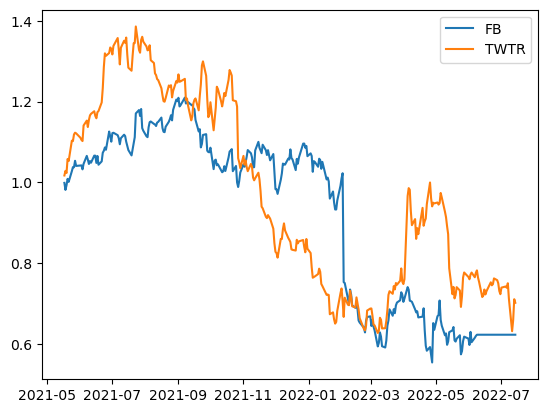

In [92]:
retty = df_closing_prices.pct_change().dropna()

(1+retty).cumprod().plot()

<br>

## Investment Value - Task

In [188]:
d = {'MSFT': [200], 'AAPL': [320]}
port = pd.DataFrame(d)
port.rename(index ={0 : 'share'}, inplace=True)
port3 = port.T

In [122]:
current_MSFT = 200
current_AAPL = 320

ticker1 = ['MSFT', 'AAPL']

In [123]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [124]:
a = pd.Timestamp('2010-11-30', tz = 'America/New_York').isoformat()
b = pd.Timestamp('2016-11-30', tz = 'America/New_York').isoformat()

In [125]:
timeframe = '1Day'

In [134]:
#get current closing prices for tickers
df_pak = alpaca.get_bars(
    ticker1,
    timeframe,
    start = a,
    end = b
).df #WHY DO WE PUT .df?

#display sample data
df_pak

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2015-12-01 05:00:00+00:00,118.75,118.81,116.860,117.34,34852374,187129,117.756760,AAPL
2015-12-02 05:00:00+00:00,117.05,118.11,116.080,116.28,33385643,180616,117.151198,AAPL
2015-12-03 05:00:00+00:00,116.55,116.79,114.220,115.20,41560785,245330,115.434888,AAPL
2015-12-04 05:00:00+00:00,115.29,119.25,115.110,119.03,57776977,307788,118.187290,AAPL
2015-12-07 05:00:00+00:00,118.98,119.86,117.810,118.28,32080754,190809,118.509111,AAPL
...,...,...,...,...,...,...,...,...
2016-11-23 05:00:00+00:00,61.01,61.10,60.250,60.40,21936368,107663,60.441067,MSFT
2016-11-25 05:00:00+00:00,60.30,60.53,60.130,60.53,8410638,44435,60.419213,MSFT
2016-11-28 05:00:00+00:00,60.34,61.02,60.210,60.61,20733011,96812,60.640260,MSFT


In [136]:
AAPL=df_pak[df_pak['symbol']=='AAPL'].drop('symbol', axis=1)
              
              
MSFT=df_pak[df_pak['symbol']=='MSFT'].drop('symbol', axis=1)

In [145]:
comb = pd.concat([AAPL, MSFT], axis=1, keys=['AAPL', 'MSFT'])
comb.head(5)

AAPL                                    \
                             open    high     low   close    volume   
timestamp                                                             
2015-12-01 05:00:00+00:00  118.75  118.81  116.86  117.34  34852374   
2015-12-02 05:00:00+00:00  117.05  118.11  116.08  116.28  33385643   
2015-12-03 05:00:00+00:00  116.55  116.79  114.22  115.20  41560785   
2015-12-04 05:00:00+00:00  115.29  119.25  115.11  119.03  57776977   
2015-12-07 05:00:00+00:00  118.98  119.86  117.81  118.28  32080754   

                                                    MSFT                       \
                          trade_count        vwap   open   high    low  close   
timestamp                                                                       
2015-12-01 05:00:00+00:00      187129  117.756760  54.41  55.23  54.30  55.22   
2015-12-02 05:00:00+00:00      180616  117.151198  55.32  55.96  55.06  55.21   
2015-12-03 05:00:00+00:00      245330  115.434888  55.49  55.77  53.93  54.20   
2015-12-04 05:00:00+00:00      307788  118.187290  54.12  56.23  54.10  55.91   
2015-12-07 05:00:00+00:00      190809  118.509111  55.79  55.97  55.29  55.81   

                                                            
                             volume trade_count       vwap  
timestamp                                                   
2015-12-01 05:00:00+00:00  39952779      194807  54.877235  
2015-12-02 05:00:00+00:00  47274879      225980  55.484361  
2015-12-03 05:00:00+00:00  38627835      219413  54.475820  
2015-12-04 05:00:00+00:00  43963662      232021  55.540921  
2015-12-07 05:00:00+00:00  30709765      182309  55.623798

In [149]:
close = pd.DataFrame()

close['AAPL'] = comb['AAPL']['close']
close['MSFT'] = comb['MSFT']['close']

close.index = close.index.date #drops time

close

,AAPL,MSFT
2015-12-01,117.34,55.22
2015-12-02,116.28,55.21
2015-12-03,115.20,54.20
2015-12-04,119.03,55.91
2015-12-07,118.28,55.81
...,...,...
2016-11-23,111.23,60.40
2016-11-25,111.79,60.53
2016-11-28,111.57,60.61
2016-11-29,111.46,61.09


In [152]:
AAPL_value = current_AAPL * AAPL.iloc[-1,0]

MFST_value = current_MSFT * MSFT.iloc[-1,0]

In [154]:
print(f'The current value of the 200 MSFT shares is ${MFST_value}')
print(f'The current value of the 320 AAPL shares is ${AAPL_value}')

The current value of the 200 MSFT shares is $12172.0
The current value of the 320 AAPL shares is $35712.0


In [ ]:
close_ret = close.pct_change()

In [162]:
da = {'MSFT': [12172.0], 'AAPL': [35712.0]}
new1 = pd.DataFrame(da)

In [163]:
new1

,MSFT,AAPL
0,12172.0,35712.0


<AxesSubplot:ylabel='share'>

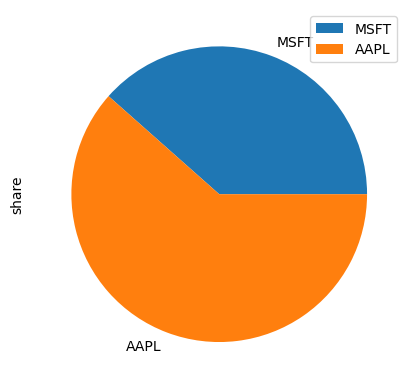

In [190]:
port3.plot(y = 'share',  kind="pie")

<AxesSubplot:>

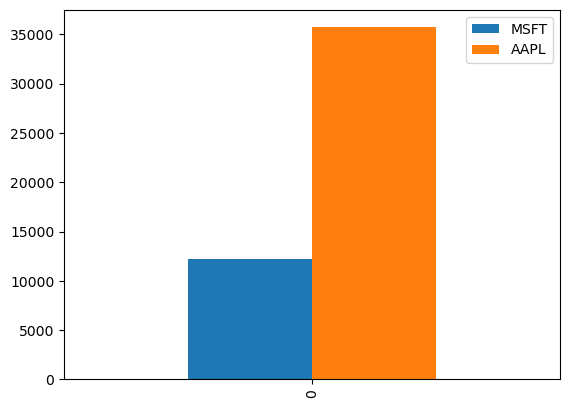

In [174]:
new1.plot(kind="bar")

<AxesSubplot:ylabel='Frequency'>

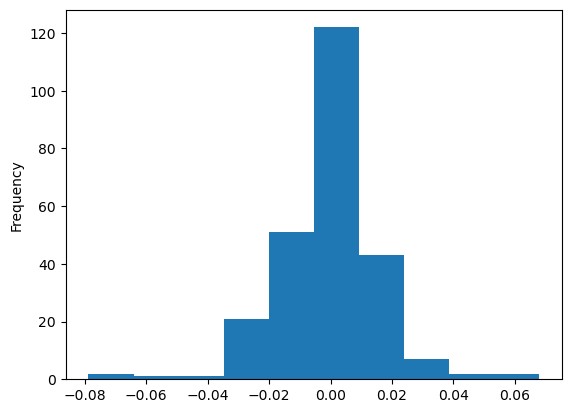

In [198]:
ready = close_ret.dropna()
ready['AAPl'].plot.hist()

<AxesSubplot:ylabel='Density'>

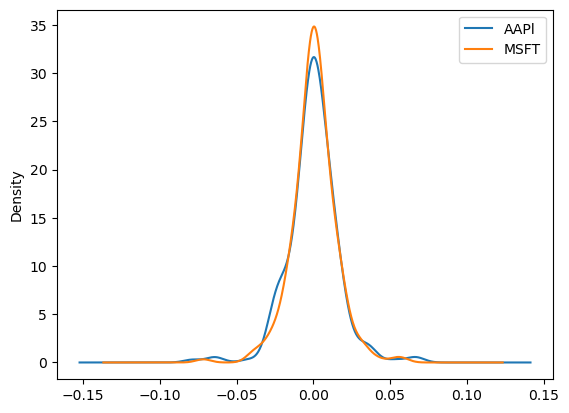

In [201]:
ready.plot.density()

<br>

In [6]:
from MCForecastTools import MCSimulation

# Monte carlo sim

In [5]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [14]:
# Set the ticker
ticker = ["TSLA", 'XOM']

# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2018-08-04", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-08-04", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for TSLA
#get current closing prices for tickers
tsla = alpaca.get_bars(
    ticker,
    timeframe,
    start = start_date,
    end = end_date
).df #WHY DO WE PUT .df?

#display sample data
tsla.head(5)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2018-08-06 04:00:00+00:00,345.46,354.98,341.8200,341.99,8564349,94745,348.791044,TSLA
2018-08-07 04:00:00+00:00,343.84,387.46,339.1501,379.57,30876809,332458,364.240162,TSLA
2018-08-08 04:00:00+00:00,369.09,382.64,367.1200,370.34,24608013,278774,374.104677,TSLA
2018-08-09 04:00:00+00:00,365.55,367.01,345.7300,352.45,17183938,195136,355.494616,TSLA
2018-08-10 04:00:00+00:00,354.00,360.00,346.0000,355.53,11556348,119931,353.663867,TSLA


In [15]:
tsla1=tsla[tsla['symbol']=='TSLA'].drop('symbol', axis =1) # kinda like an if
XOM =tsla[tsla['symbol']=='XOM'].drop('symbol', axis =1)


kaker = pd.concat([tsla1,XOM], axis=1, keys=['tsla1' , 'XOM']) # don't understand 'keys' input

kaker.head(5)

tsla1                                      \
                             open    high       low   close    volume   
timestamp                                                               
2018-08-06 04:00:00+00:00  345.46  354.98  341.8200  341.99   8564349   
2018-08-07 04:00:00+00:00  343.84  387.46  339.1501  379.57  30876809   
2018-08-08 04:00:00+00:00  369.09  382.64  367.1200  370.34  24608013   
2018-08-09 04:00:00+00:00  365.55  367.01  345.7300  352.45  17183938   
2018-08-10 04:00:00+00:00  354.00  360.00  346.0000  355.53  11556348   

                                                     XOM                  \
                          trade_count        vwap   open    high     low   
timestamp                                                                  
2018-08-06 04:00:00+00:00       94745  348.791044  80.25  80.430  79.740   
2018-08-07 04:00:00+00:00      332458  364.240162  80.91  81.590  80.310   
2018-08-08 04:00:00+00:00      278774  374.104677  81.02  81.230  80.350   
2018-08-09 04:00:00+00:00      195136  355.494616  80.73  80.905  80.110   
2018-08-10 04:00:00+00:00      119931  353.663867  79.51  79.524  78.855   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2018-08-06 04:00:00+00:00  80.18  10104173       48036  80.151006  
2018-08-07 04:00:00+00:00  81.27  10716555       59518  81.205688  
2018-08-08 04:00:00+00:00  80.73   7275092       40331  80.675130  
2018-08-09 04:00:00+00:00  80.32   9828559       56362  80.331460  
2018-08-10 04:00:00+00:00  79.42  12954530       63037  79.279509

In [16]:
dap = pd.DataFrame()
dap['TSLA'] = kaker['tsla1']['close']
dap['XOM'] = kaker['XOM']['close']

In [23]:
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

In [31]:
# Set number of simulations
num_sims = 1000


#initialize function
a = MCSimulation(
    portfolio_data = kaker,
    weights=[0.5,0.5],
    num_simulation=num_sims,
    num_trading_days=252*3
)

In [33]:
a.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/johnbilsel/Desktop/code/Fintech/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011098,0.959021,0.931077,1.006518,0.994996,0.991079,1.001368,1.038260,0.989636,0.992965,...,1.022288,0.944221,0.987480,1.046009,0.953401,1.001138,1.014114,1.013492,1.014361,1.009706
2,0.982941,0.976844,0.898517,1.019304,0.984266,1.005367,1.028800,1.070823,0.973429,0.990543,...,0.971353,0.925521,0.967741,1.013091,0.921774,0.959205,0.998049,1.020570,1.002750,1.025596
3,0.968929,0.973409,0.894538,1.055996,0.990451,0.989065,1.058753,1.074644,0.977735,0.963948,...,0.976641,0.955581,0.954364,1.101770,0.954922,0.960732,1.018352,0.945519,1.003838,1.001827
4,0.984790,0.964799,0.876104,0.987348,0.938279,0.971645,1.103415,1.064786,0.943012,0.988930,...,1.008001,0.922631,0.952861,1.135570,0.956348,0.953848,0.997638,0.931509,1.026187,0.991639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,1.864100,2.101639,0.596030,1.889534,1.424150,1.789088,7.043483,1.082711,1.173569,3.441886,...,0.545657,2.096006,0.943947,1.225819,4.365868,1.864059,1.858668,1.367918,0.989927,1.284246
753,1.850252,2.126991,0.610012,1.935388,1.488696,1.771295,6.962585,1.096722,1.174226,3.430087,...,0.536375,2.155299,0.944017,1.237167,4.352160,1.829526,1.931944,1.339975,0.976091,1.302204
754,1.910018,2.141285,0.628408,1.913691,1.497034,1.709619,6.996208,1.034302,1.169406,3.571231,...,0.556764,2.145878,0.961907,1.264808,4.609551,1.819187,2.073505,1.361815,1.005026,1.268284
755,1.931774,2.147502,0.618220,1.879563,1.476913,1.640347,7.181869,1.056567,1.157432,3.601590,...,0.562180,2.202424,0.942549,1.234119,4.704379,1.805393,2.039874,1.329011,1.029701,1.288840


<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 756 Trading Days.'}>

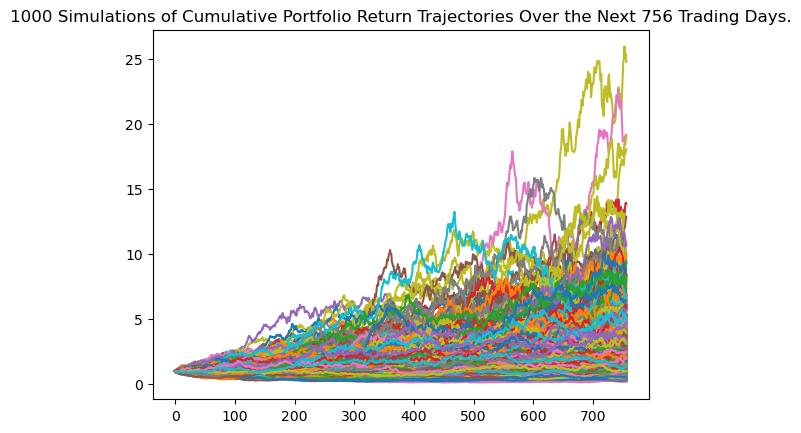

In [38]:
a.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

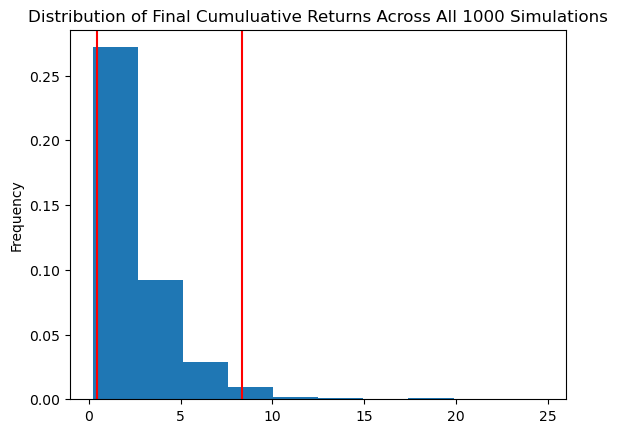

In [36]:
a.plot_distribution()

In [39]:
sim_ret = {
    "mean": list(a.simulated_return.mean(axis=1)),
    "median": list(a.simulated_return.median(axis=1)),
    "min": list(a.simulated_return.min(axis=1)),
    "max": list(a.simulated_return.max(axis=1))
}

df_sim_ret = pd.DataFrame(sim_ret)

df_sim_ret

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.002219,1.001979,0.907921,1.088850
2,1.003195,1.000528,0.875970,1.165797
3,1.004448,1.002504,0.850875,1.200163
4,1.006660,1.004187,0.846246,1.198335
...,...,...,...,...
752,2.598114,1.979656,0.209457,25.091317
753,2.601610,1.978781,0.211432,25.972023
754,2.601030,2.011830,0.210566,25.149305
755,2.604716,2.012433,0.211340,25.394292


In [41]:
a.summarize_cumulative_return()

count           1000.000000
mean               2.605717
std                2.259642
min                0.209425
25%                1.224774
50%                1.994579
75%                3.273245
max               24.782888
95% CI Lower       0.449803
95% CI Upper       8.335665
Name: 756, dtype: float64